![My Image](https://lh3.googleusercontent.com/u/0/drive-viewer/AKGpihZwzoCugrTTvw9PlwFypZ_9h7g45bbv2B7S7_ZTvOEFBDFNqiOIE-KklBeqbnWTK2wQoqDnMB5d1-RYjq6W9lmBcpeqet7ku0A=w1909-h885-rw-v1)


---
# **RNN**
---

**Las redes recurrentes se empleaban para resolver problemas de procesamiento natural de lenguaje (NLP)**. Pero existían tres problemas pricipales:
* **Long-Term Dependencies**. Capturar dependencias a largo plazo en datos secuenciales es un problema. Surgieron:
  * LSTM
  * GRU
* **Vanishing and Exploding Gradientes**. Gradientes que desaparecen o "explotan" disminuye su capacidad para "recordar" aspectos importantes de una frase con muy distancia (en palabras) entre sí.
* **LENTITUD**. Las RNN son lentas porque deben de procesar los datos secuencialmente. *Las LSTM lo son aún más*

![](https://th.bing.com/th/id/OIP.kl2ldmXEFCxVtvDVsDePugAAAA?rs=1&pid=ImgDetMain)

## ¿Cómo funcionan los transformers?
![](https://jalammar.github.io/images/t/the_transformer_3.png)

1. **Embeddings**: Realizar un espacio de *embeddings* donde las palabras correlacionadas entre sí ocupan un lugar cercano.
   * Palabra -> Vector
2. **Positional Encoder**. Dependiendo la frase, las palabras tienen distintos significados o matices, entonces surge ***Positional Encoder***.
   
**Encoder**
1. **Attention**: Matriz que podera cada parte de la frase. Es parecido al kernel de una CNN.
2. **Feed Forward**. Red Neuronal simple que se aplicada a cada vector de atención.


**Decoder**
1. **Atention**.
2. **Encoder-Decoder Attention**. Se tienen dos entradas, una por el Input y otra por el Target. De cada entrada se tiene un vector para cada palabra. Con esto se consigue qué palabra se relacionada con cada vector del otro dominio.
3. **Feed Forward**


![](https://jalammar.github.io/images/t/The_transformer_encoders_decoders.png)


**Output**
1. **Linear layer**. Otra red neuronal. # Neuronas = # Palabras en dominio objetivo.
2. **Softmax activation**. Consigue la distribución de probabilidades, que puede ser interpretado por humanos.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/image4.png" style="width:50%;">


---
# **Attention Mechanisms**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
x = torch.tensor([[1,0], [0,1], [-0.5, -0.5]])
x

tensor([[ 1.0000,  0.0000],
        [ 0.0000,  1.0000],
        [-0.5000, -0.5000]])

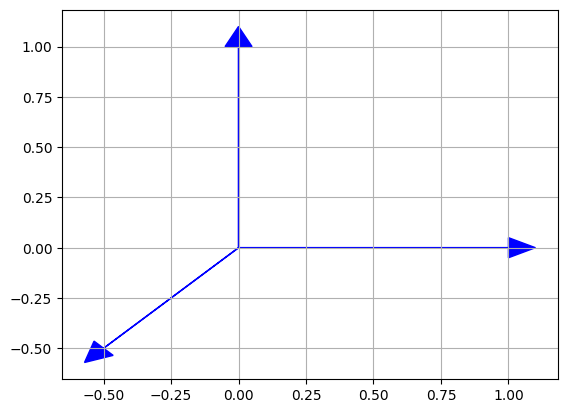

In [ ]:
def plot_vectors(X, y=None):
    ax = plt.axes()
    plt.grid()
    for x in X:
        ax.arrow(0, 0, x[0], x[1], head_width=0.1, head_length=0.1, color='blue')
    if y is not None:
        for _y in y:
            if _y.sum() !=0:
                ax.arrow(0,0, _y[0], _y[1], head_width=0.1, head_length=0.1, color='red')

        plt.xlim(-1,1.5)
        plt.ylim(-1, 1.5)
        plt.show()

plot_vectors(x)

In [ ]:
a = torch.tensor([1,0,0])
a

tensor([1, 0, 0])

In [ ]:
y = a.unsqueeze(1)*x
y

tensor([[1., 0.],
        [0., 0.],
        [-0., -0.]])

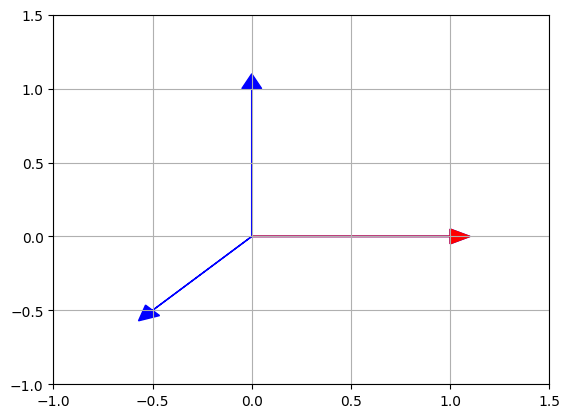

In [ ]:
plot_vectors(x, y)

In [ ]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
Y = A @ x
Y

tensor([[ 1.0000,  0.0000],
        [ 0.0000,  1.0000],
        [-0.5000, -0.5000]])

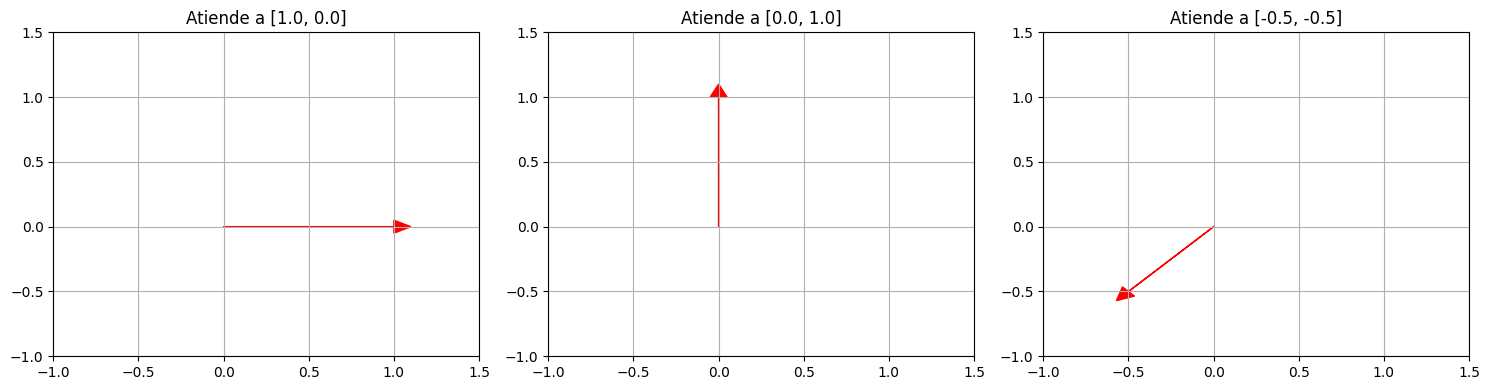

In [ ]:
def plot(X, Y):
    fig = plt.figure(figsize=(15,4))
    for i, (x, y) in enumerate(zip(X, Y)):
      ax = plt.subplot(1, 3, i + 1)
      for x in X:
          ax.arrow(0, 0, x[0], x[1], head_width=0.1, color="white", head_length=0.1)
      ax.arrow(0, 0, y[0], y[1], head_width=0.1, head_length=0.1, color='red')
      ax.set_xlim(-1,1.5)
      ax.set_ylim(-1,1.5)
      ax.grid(True)
      ax.set_title(f"Atiende a {X[i].tolist()}")
    plt.tight_layout()
    plt.show()

plot(x, Y)

## **Soft attention**

In [ ]:
A = torch.ones((3,3))*0.1
A.fill_diagonal_(0.8)
A

tensor([[0.8000, 0.1000, 0.1000],
        [0.1000, 0.8000, 0.1000],
        [0.1000, 0.1000, 0.8000]])

In [ ]:
Y = A @ x
Y

tensor([[ 0.7500,  0.0500],
        [ 0.0500,  0.7500],
        [-0.3000, -0.3000]])

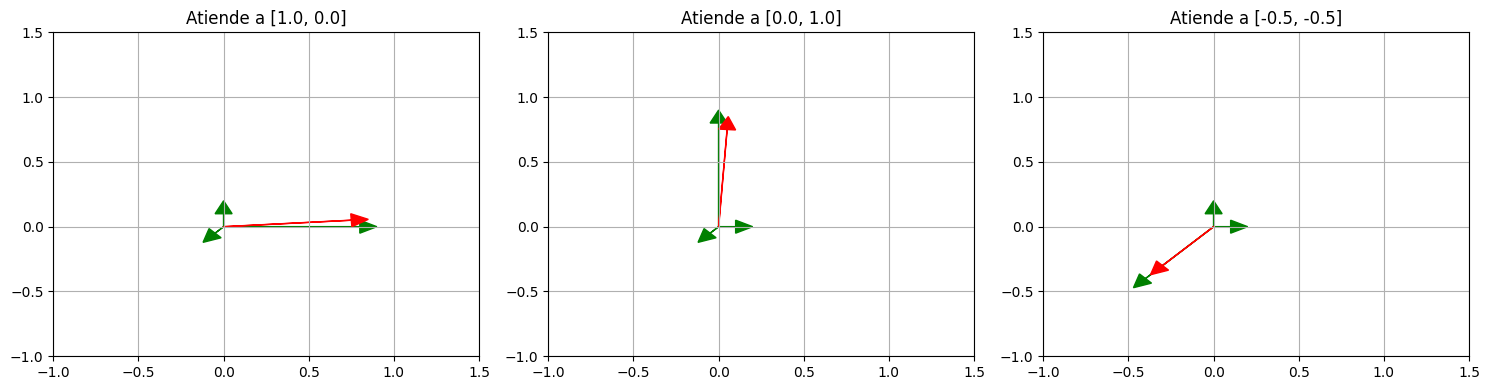

In [ ]:
def plot(X, Y):
    fig = plt.figure(figsize=(15,4))
    for i, (x, y) in enumerate(zip(X, Y)):
      ax = plt.subplot(1, 3, i + 1)
      for x in X:
          ax.arrow(0, 0, x[0], x[1], color="white", head_width=0.1, head_length=0.1)
      Z = A[i].unsqueeze(1) * X
      for z in Z:
        ax.arrow(0, 0, z[0], z[1], head_width=0.1, head_length=0.1, color='green')
      ax.arrow(0, 0, y[0], y[1], head_width=0.1, head_length=0.1, color='red')
      ax.set_xlim(-1,1.5)
      ax.set_ylim(-1,1.5)
      ax.grid(True)
      ax.set_title(f"Atiende a {X[i].tolist()}")
    plt.tight_layout()
    plt.show()

plot(x, Y)

En verde aparece la contribución de cada vector al resultado. En rojo se aprecian los vectores generados por el mecanismo de atención.

In [20]:
import numpy as np
from transformers import BertTokenizer

In [22]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [23]:
frase = "Hola, mundo"
frase

'Hola, mundo'

In [25]:
encoded = tokenizer(frase, return_tensors='np', add_special_tokens=False)
encoded

{'input_ids': array([[ 7570,  2721,  1010, 25989]]), 'token_type_ids': array([[0, 0, 0, 0]]), 'attention_mask': array([[1, 1, 1, 1]])}

In [27]:
encoded = encoded["input_ids"][0]
encoded

array([ 7570,  2721,  1010, 25989])

In [29]:
A = np.identity(len(encoded))
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [30]:
resultado = np.dot(encoded, A)
resultado

array([ 7570.,  2721.,  1010., 25989.])

In [31]:
decoded = tokenizer.decode(resultado)
decoded

'hola, mundo'

## **Self attention**

In [ ]:
A = torch.softmax(x @ x.T, 1)
A

tensor([[0.6285, 0.2312, 0.1402],
        [0.2312, 0.6285, 0.1402],
        [0.2119, 0.2119, 0.5761]])

In [ ]:
Y = A @ x
Y

tensor([[ 0.5584,  0.1611],
        [ 0.1611,  0.5584],
        [-0.0761, -0.0761]])

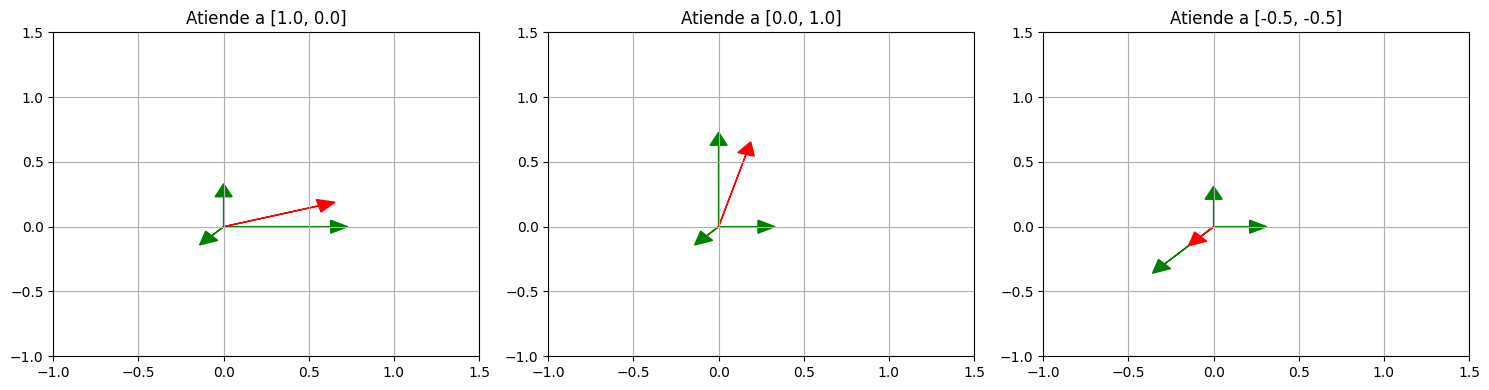

In [ ]:
plot(x, Y)

# **Scaled Dot-Product Attention**

![](https://juansensio.com/blog/061/selfattention.png)

$$Attention(Q,K,V)= softmax(\frac{Q K^T}{\sqrt{d_k}}) V$$



In [ ]:
! pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 28.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [ ]:
import pytorch_lightning as pl
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import fetch_openml
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.int64)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, ix):
        return self.X[ix], self.y[ix]

class MNISTDataModule(pl.LightningDataModule):

    def __init__(self, batch_size: int = 64, Dataset=Dataset):
        super().__init__()
        self.batch_size = batch_size
        self.Dataset = Dataset

    def setup(self, stage=None):
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        X, y = mnist['data'], mnist['target']
        # Convertimos a float y dividimos aquí para evitar problemas posteriores
        X = X.astype(float) / 255.0
        y = y.astype(int)
        # División de los datos
        X_train, X_test = X[:60000], X[60000:]
        y_train, y_test = y[:60000], y[60000:]
        # Instanciar datasets
        self.train_ds = self.Dataset(X_train, y_train)
        self.val_ds = self.Dataset(X_test, y_test)

    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size)


In [ ]:
dm = MNISTDataModule()
dm.setup()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
imgs, labels = next(iter(dm.train_dataloader()))
print(imgs.shape, labels.shape)

torch.Size([64, 784]) torch.Size([64])


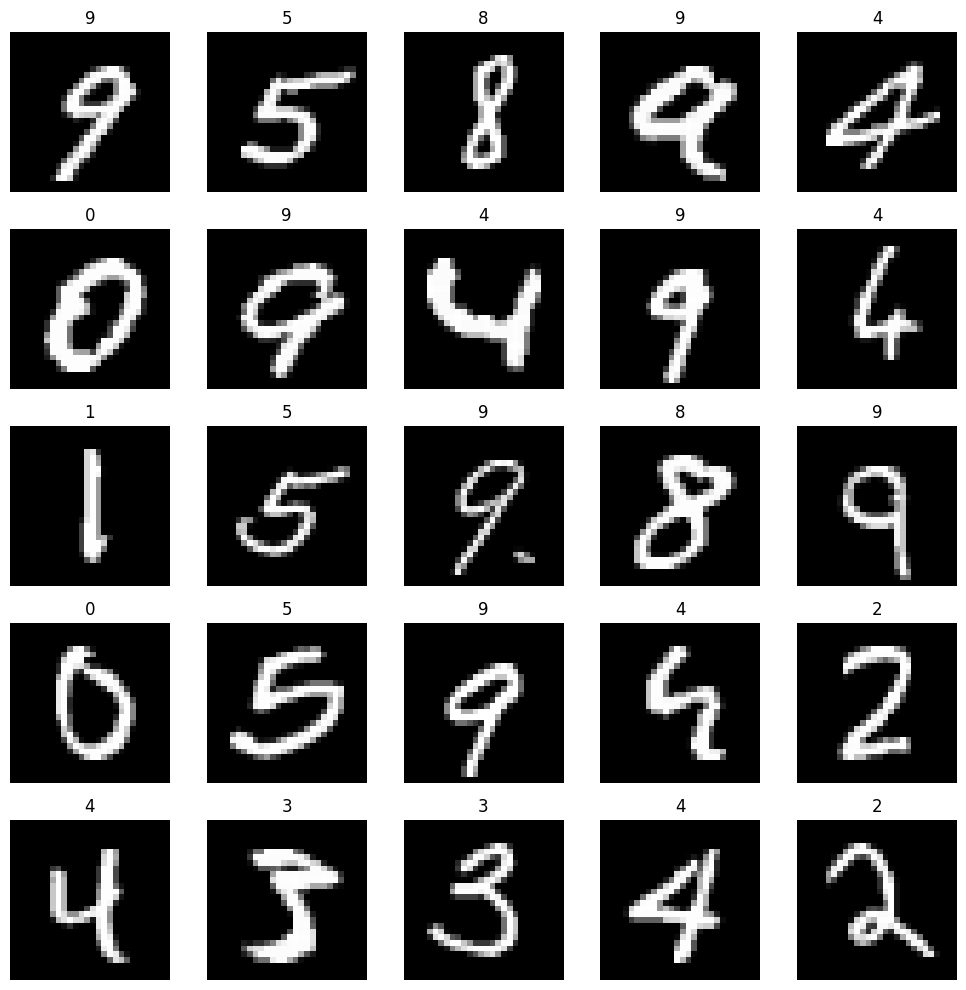

In [ ]:
r, c = 5, 5
fig = plt.figure(figsize=(c*2, r*2))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.reshape(28,28), cmap="gray")
        ax.set_title(label.item())
plt.tight_layout()
plt.show()

In [ ]:
class MLP(pl.LightningModule):

    def __init__(self):
        super().__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(784, 784),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(784, 10)
        )

    def forward(self, x):
        return self.mlp(x)

    def predict(self, x):
        with torch.no_grad():
          y_hat = self(x)
          return torch.argmax(y_hat, axis=1)

    def compute_loss_and_acc(self, batch):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (torch.argmax(y_hat, axis=1) == y).sum().item() / y.shape[0]
        return loss, acc

    def training_step(self, batch, batch_idx):
        loss, acc = self.compute_loss_and_acc(batch)
        self.log('loss', loss)
        self.log('acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, acc = self.compute_loss_and_acc(batch)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.003)
        return optimizer

In [ ]:
mlp = MLP()
outuput = mlp(torch.randn(64, 784))
outuput.shape

torch.Size([64, 10])

In [ ]:
mlp = MLP()
trainer = pl.Trainer(max_epochs=5, logger=None)
trainer.fit(mlp, dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type       | Params
------------------------------------
0 | mlp  | Sequential | 623 K 
------------------------------------
623 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
imgs, labels = next(iter(dm.val_dataloader()))
preds = mlp.predict(imgs)

r, c = 5, 5
fig = plt.figure(figsize=(c*2, r*2))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.reshape(28,28), cmap="gray")
        ax.set_title(f'{label.item()}/{preds[ix].item()}', color="green" if label == preds[ix] else 'red')
plt.tight_layout()
plt.show()

# **Resolviendo con Mecanismos de Atención**

In [ ]:
class AttnDataset(torch.utils.data.Dataset):
  def __init__(self, X, y, patch_size=(7, 7)):
    self.X = X
    self.y = y
    self.patch_size = patch_size

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    image = torch.tensor(self.X[ix]).float().view(28, 28) # 28 x 28
    h, w = self.patch_size
    patches = image.unfold(0, h, h).unfold(1, w, w) # 4 x 4 x 7 x 7
    patches = patches.contiguous().view(-1, h*w) # 16 x 49
    return patches, torch.tensor(self.y[ix]).long()

In [ ]:
attn_dm = MNISTDataModule(Dataset = AttnDataset)
attn_dm.setup()
imgs, labels = next(iter(attn_dm.train_dataloader()))
imgs.shape, labels.shape

(torch.Size([64, 16, 49]), torch.Size([64]))

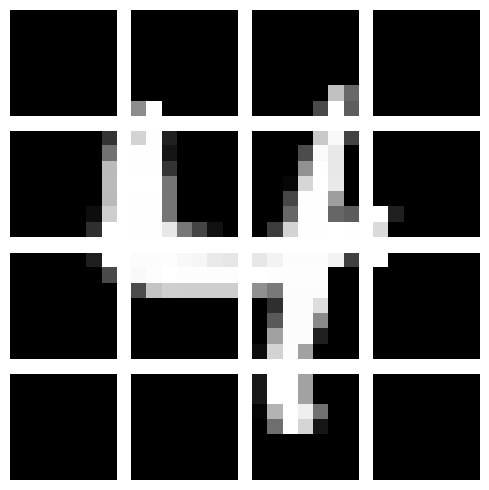

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(5,5))
for i in range(4):
    for j in range(4):
        ax = plt.subplot(4, 4, i*4 + j + 1)
        ax.imshow(imgs[6,i*4 + j].view(7, 7), cmap="gray")
        ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# basado en: https://github.com/karpathy/minGPT/blob/master/mingpt/model.py
import math

class ScaledDotSelfAttention(torch.nn.Module):

    def __init__(self, n_embd):
        super().__init__()

        # key, query, value projections
        self.key = torch.nn.Linear(n_embd, n_embd)
        self.query = torch.nn.Linear(n_embd, n_embd)
        self.value = torch.nn.Linear(n_embd, n_embd)

    def forward(self, x):
        B, L, F = x.size()
        # Batch_size, Long=16, Features = 49

        # calculate query, key, values
        k = self.key(x) # (B, L, F)
        q = self.query(x) # (B, L, F)
        v = self.value(x) # (B, L, F)

        # attention (B, L, F) x (B, F, L) -> (B, L, L)
        att = (q @ k.transpose(1, 2)) * (1.0 / math.sqrt(k.size(-1)))
        att = torch.nn.functional.softmax(att, dim=-1)
        y = att @ v # (B, L, L) x (B, L, F) -> (B, L, F)

        return y

class Model(MLP):

    def __init__(self, n_embd=7*7, seq_len=4*4):
        super().__init__()
        self.mlp = None

        self.attn = ScaledDotSelfAttention(n_embd)
        self.actn = torch.nn.ReLU(inplace=True)
        self.fc = torch.nn.Linear(n_embd*seq_len, 10)

    def forward(self, x):
        x = self.attn(x)
        #print(x.shape)
        y = self.fc(self.actn(x.view(x.size(0), -1)))
        #print(y.shape)
        return y

In [ ]:
model = Model()
trainer = pl.Trainer(max_epochs=5, logger=None)
trainer.fit(model, attn_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type                   | Params
------------------------------------------------
0 | attn | ScaledDotSelfAttention | 7.4 K 
1 | actn | ReLU                   | 0     
2 | fc   | Linear                 | 7.9 K 
------------------------------------------------
15.2 K    Trainable params
0         Non-trainable params
15.2 K    Total params
0.061     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


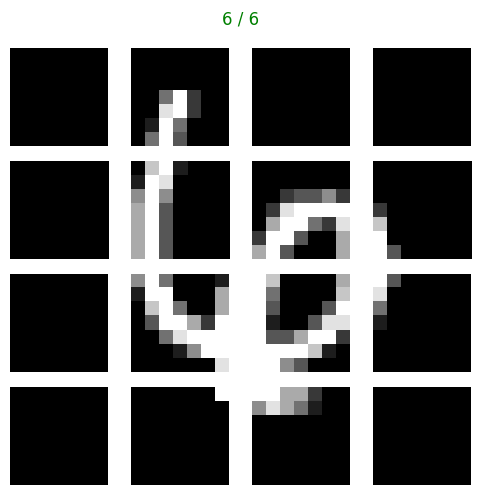

In [ ]:
import random

attn_imgs, attn_labels = next(iter(attn_dm.val_dataloader()))
preds = model.predict(attn_imgs)

ix = random.randint(0, dm.batch_size)
fig = plt.figure(figsize=(5,5))
for i in range(4):
    for j in range(4):
        ax = plt.subplot(4, 4, i*4 + j + 1)
        ax.imshow(attn_imgs[ix,i*4 + j].view(7, 7), cmap="gray")
        ax.axis('off')
fig.suptitle(f'{attn_labels[ix]} / {preds[ix].item()}', color="green" if attn_labels[ix] == preds[ix].item() else "red")
plt.tight_layout()
plt.show()

---
# **Multi-Head Attention**

![](https://juansensio.com/blog/062/multiheadattention.png)

Este mecanismo toma inspiración en el uso de múltiples filtros en una red convolucional para mejorar la capacidad de representación de datos. En el contexto de atención, esto se traduce en repetir un número determinado de veces (*heads* o cabezas) el mecanismo de *scaled-dot product attention*

$$MultiHead(Q,K,V)= Concat(head_1, ..., head_h) W^o$$

donde

$$ head_i = Attention(QW_q^i, KW_k^i, VW_v^i) $$

In [ ]:
class AttnDataset(torch.utils.data.Dataset):
  def __init__(self, X, y, patch_size=(7, 7)):
    self.X = X
    self.y = y
    self.patch_size = patch_size

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    image = torch.tensor(self.X[ix]).float().view(28, 28) # 28 x 28
    h, w = self.patch_size
    patches = image.unfold(0, h, h).unfold(1, w, w) # 4 x 4 x 7 x 7
    patches = patches.contiguous().view(-1, h*w) # 16 x 49
    return patches, torch.tensor(self.y[ix]).long()

In [ ]:
attn_dm = MNISTDataModule(Dataset = AttnDataset)
attn_dm.setup()

(torch.Size([64, 16, 49]), torch.Size([64]))

In [ ]:
imgs, labels = next(iter(attn_dm.train_dataloader()))
imgs.shape, labels.shape

Debido a la baja dimensionalidad de nuestro ejemplo, vamos a repetir nuestro mecanismo de atención básico n_heads número de veces. Sin embargo, en la práctica, se divide la dimensión del embedding por este número de cabezas. Un detalle importante a tener en cuenta :)

In [ ]:
# basado en: https://github.com/karpathy/minGPT/blob/master/mingpt/model.py
import math

class MultiHeadAttention(torch.nn.Module):

    def __init__(self, n_embd, n_heads):
        super().__init__()
        self.n_heads = n_heads

        # key, query, value projections
        self.key = torch.nn.Linear(n_embd, n_embd*n_heads)
        self.query = torch.nn.Linear(n_embd, n_embd*n_heads)
        self.value = torch.nn.Linear(n_embd, n_embd*n_heads)

        # output projection (# Características, # salidas)
        self.proj = torch.nn.Linear(n_embd*n_heads, n_embd)

    def forward(self, x):
        B, L, F = x.size()

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        k = self.key(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)
        q = self.query(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)
        v = self.value(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)

        # attention (B, nh, L, F) x (B, nh, F, L) -> (B, nh, L, L)
        att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
        att = torch.nn.functional.softmax(att, dim=-1)
        y = att @ v # (B, nh, L, L) x (B, nh, L, F) -> (B, nh, L, F)
        y = y.transpose(1, 2).contiguous().view(B, L, F*self.n_heads) # re-assemble all head outputs side by side
        # Intercambiamos las dimensiondes de las cabezas de atención y la longitud de la secuencia
        # Nos aseguramos de que sean contiguas en memoria. Al hacer tranpose no se cambia el valor el en memoria.
        # Alineamos todas las capas cabezas de atención en una sola dimensión



        return self.proj(y)

class Model(MLP):

    def __init__(self, n_embd=7*7, seq_len=4*4, n_heads=4*4):
        super().__init__()
        self.mlp = None

        self.attn = MultiHeadAttention(n_embd, n_heads)
        self.actn = torch.nn.ReLU(inplace=True)
        self.fc = torch.nn.Linear(n_embd*seq_len, 10)

    def forward(self, x):
        x = self.attn(x)
        #print(x.shape)
        y = self.fc(self.actn(x.view(x.size(0), -1)))
        #print(y.shape)
        return y

In [ ]:
model = Model()
trainer = pl.Trainer(max_epochs=5, logger=None)
trainer.fit(model, attn_dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type               | Params
--------------------------------------------
0 | attn | MultiHeadAttention | 156 K 
1 | actn | ReLU               | 0     
2 | fc   | Linear             | 7.9 K 
--------------------------------------------
163 K     Trainable params
0         Non-trainable params
163 K     Total params
0.656     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


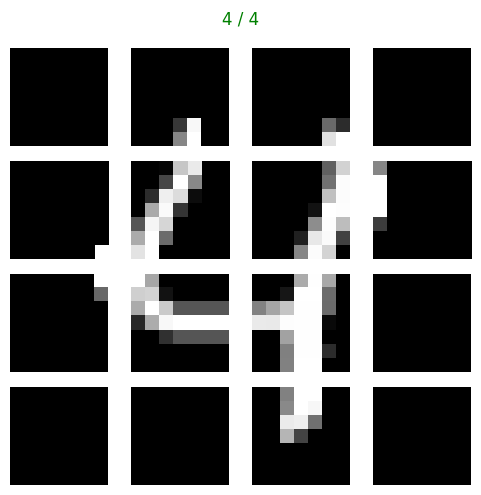

In [ ]:
import random

attn_imgs, attn_labels = next(iter(attn_dm.val_dataloader()))
preds = model.predict(attn_imgs)

ix = random.randint(0,attn_dm.batch_size)
fig = plt.figure(figsize=(5,5))
for i in range(4):
    for j in range(4):
        ax = plt.subplot(4, 4, i*4 + j + 1)
        ax.imshow(attn_imgs[ix,i*4 + j].view(7, 7), cmap="gray")
        ax.axis('off')
fig.suptitle(f'{attn_labels[ix]} / {preds[ix].item()}', color="green" if attn_labels[ix] == preds[ix].item() else "red")
plt.tight_layout()
plt.show()

---
# **Transformers más populares**
---

| Modelo          | Lanzamiento | Aplicación Principal                                                           |
|-----------------|-------------|--------------------------------------------------------------------------------|
| **BERT**        | 2018        | Comprensión del lenguaje, sistemas de respuesta a preguntas                    |
| **GPT-3**       | 2020        | Generación de texto, conversación automatizada, aplicaciones creativas         |
| **T5**          | 2019        | Tareas NLP diversas mediante un enfoque de texto a texto                       |
| **ViT**         | 2020        | Procesamiento de imágenes usando arquitecturas transformer                     |
| **Llama**       | 2022        | Tareas de NLP diversas, entrenamiento eficiente en múltiples tareas            |
| **CLIP**        | 2021        | Vinculación de texto e imagen, búsquedas visuales basadas en descripciones     |
| **BART**        | 2019        | Generación y comprensión de texto, especialmente para resúmenes                |



---
# **APLICACIONES**
---

In [9]:
from transformers import pipeline

## **1. Traducción**
---
Parte de los modelos **OPUS-MT** desarrollado por el grupo NLP de la Unviersidad de Helsinki.

In [10]:
# Cargar el modelo de traducción
translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [11]:
# Texto de ejemplo en inglés
text = "Hello, how are you?"

# Traducir el texto al español
translated_text = translator(text, max_length=40)[0]['translation_text']
print("Texto traducido:", translated_text)

Texto traducido: Hola, ¿cómo estás?


## **Text-To-Speech**
---

**Google Text-To-Speech**
* Hace una llamada a la API de remota. No se requiere instalación lcoal del modelo.

In [1]:
!pip install gtts

In [2]:
from gtts import gTTS

In [3]:
import IPython.display as ipd

tts = gTTS('¡Me alegra mucho escuchar eso! Me agradría poder verte el fin de semana', lang='es')
tts.save('hola.mp3')

# Reproducir el audio
ipd.Audio("hola.mp3")

## **3. Generación de Texto**
---
**GPT-2**

In [4]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Cargar el modelo y el tokenizador
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [5]:
# Texto inicial para la generación
prompt = "In a distant future, humans and robots"
inputs = tokenizer.encode(prompt, return_tensors="pt")

# Configurar el dispositivo (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
inputs = inputs.to(device)

# Generar texto
outputs = model.generate(
    inputs,
    max_length=100,
    num_return_sequences=1,
    no_repeat_ngram_size=2,
    temperature=0.7,
    top_k=50,
    top_p=0.95
)

# Decodificar y mostrar el texto generado
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [6]:
# Función para agregar saltos de línea cada cien palabras
def insert_newlines(text, word_limit):
    words = text.split()
    for i in range(word_limit, len(words), word_limit):
        words[i] = '\n' + words[i]
    return ' '.join(words)

# Aplicar la función al texto generado
formatted_text = insert_newlines(generated_text, 20)
print("Respuesta:", formatted_text)

Respuesta: In a distant future, humans and robots would be able to communicate with each other, and the only way to 
do so would involve a robot that could communicate directly with humans. The idea of a human-like robot was first 
proposed by the late physicist and futurist Richard Feynman in the early 1960s. He proposed that humans would have a 
"human-machine interface" that would allow them to interact with one another, but that this interface would not be as seamless 
as the


In [12]:
# Traducir el texto al español
translated_text = translator(generated_text, max_length=200)[0]['translation_text']
# Aplicar la función al texto generado

formatted_text = insert_newlines(translated_text, 20)
print("Respuesta:", formatted_text)

Respuesta: En un futuro lejano, los humanos y los robots serían capaces de comunicarse entre sí, y la única manera de 
hacerlo implicaría a un robot que pudiera comunicarse directamente con los humanos. La idea de un robot humano fue propuesta 
por primera vez por el difunto físico y futurista Richard Feynman a principios de la década de 1960. Propuso que 
los humanos tuvieran una "interfaz humano-máquina" que les permitiera interactuar entre sí, pero que esta interfaz no sería tan fluida 
como la


**Text to Speech**

In [19]:
tts = gTTS(translated_text, lang='es')
tts.save('hola.mp3')

# Reproducir el audio
ipd.Audio("hola.mp3")

---